# Making critical difference plot to compare models

https://medium.com/@catur.supriyanto/how-to-visualize-the-nemenyi-and-bonferroni-dunn-diagrams-in-python-aa6a311f1cee

Used for inspiration


TO DO: 

Find 10 interesting datasets --> lung sound, ECG, arrow head ...
Test Catch22 / Some other type of feature extraction together with K-NN, K-NN + double classifier, Logistic Regression, Logistic regression with double classifier, Random forest, random forest with double classifier. Do grid search to find parameters. Maybe try ROCKET??

Functions needed: 

def get_initial_classifier(full_train_X,full_train_y, clf, param_grid):
    return clf 
    
def get_helping_classifier(X_train, y_train, X_val, y_val, clf, param_grid): 
    return clf_help
    
def filter_test_set(clf_help, X_test, y_test)
    return X_test, y_test

In [11]:
import Orange 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


accuracy_problems = {
    'lung_sound_data': {
        'K-NN' : 0.7933753943217665,
        'K-NN, double' : 0.792604501607717,
        'Logistic regression': 0.6971608832807571 ,
        'Logistic regression, double' : 0.6971608832807571 
    },
    'arrowhead': {
        'K-NN' : 0.8837209302325582,
        'K-NN, double' : 0.9142857142857143 ,
        'Logistic regression': 0.6976744186046512,
        'Logistic regression, double' : 0.7142857142857143
    },
    'gunpoint': {
        'K-NN' : 0.825 ,
        'K-NN, double' : 0.8285714285714286,
        'Logistic regression': 0.95,
        'Logistic regression, double' : 0.9444444444444444
    },
    'osuleaf': {
        'K-NN' : 0.6404494382022472,
        'K-NN, double' : 0.6666666666666666 ,
        'Logistic regression': 0.5617977528089888 ,
        'Logistic regression, double' : 0.6222222222222222
    },
    'ECG5000': {
        'K-NN' : 0.929,
        'K-NN, double' : 0.9394250513347022 ,
        'Logistic regression': 0.893 ,
        'Logistic regression, double' : 0.8994871794871795
    },
    'ECG200': {
        'K-NN' : 0.725,
        'K-NN, double' : 0.7058823529411765 ,
        'Logistic regression': 0.75 ,
        'Logistic regression, double' : 0.76
    }
}

cd= 1.1681523873193944


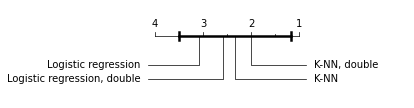

In [12]:
df = pd.DataFrame(data = accuracy_problems).T
df.head()

rank = df.rank(axis = 1, ascending = False)
rank.head()

av_rank = rank.mean(axis = 0)


avranks = av_rank.values
names = rank.columns.to_list()

cd = Orange.evaluation.compute_CD(avranks, 14,alpha='0.05', test='bonferroni-dunn') #tested on 14 datasets 
print('cd=',cd)
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=5, textspace=1.5, cdmethod=0, reverse = True)
plt.show();